<a href="https://colab.research.google.com/github/ymirandan/projetosPython/blob/main/DS%3A%20Classificacao%20de%20Churn" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
definir se cliente sairá da empresa telefonica (churn) a partir das variaveis apresentadas

# 1: Importando os dados e noções das dimensões


In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


Percebemos diversas variáveis categóricas. Apenas uma dimensao, o valor da conta, é numérica.

Para trabalhar com algoritmo de ML, iremos transformar as variaveis categoricas em numericas

# 2 - Modificação de variaveis categoricas para variaveis binarias

In [5]:
traducao_dic = {'Sim':1,
                'Nao':0}
dados_modificados = dados[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(traducao_dic)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


alternativamente, essa modificação pode ser feita com a função get_dummies da biblioteca pandas.

iremos aplica-la nas categorias restantes. para tanto, irei retirar as colunas mencionadas no codigo acima:

In [6]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'],axis=1))

dados_final = pd.concat([dados_modificados,dummie_dados],axis=1)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


# 3 - verificando se a variavel esta balanceada (mesma proporção de 0-1)

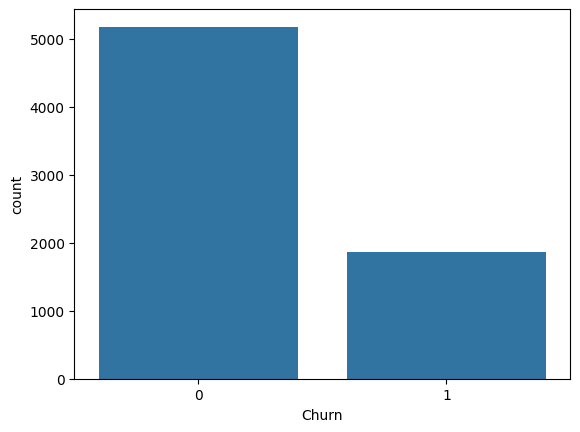

In [8]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

como está desbalanceada, fazemos:

In [9]:
# aplicação do SMOTE: separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [10]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [11]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,...,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,0,1,0,0


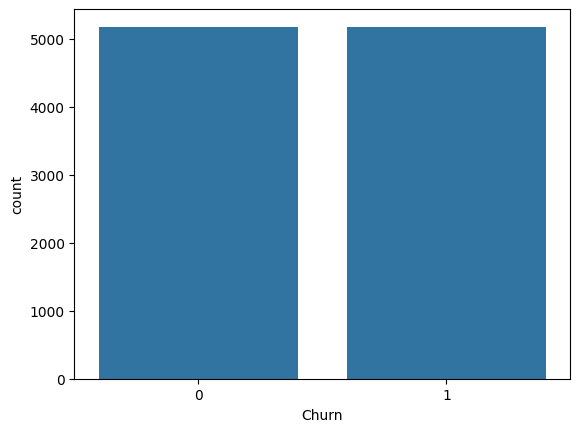

In [12]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

# 4 - Utilizando KNN (Treino e Teste)


In [13]:
#Divisão em inputs e outputs
X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']


In [14]:
#biblioteca para padronizar os dados
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)

In [15]:
#biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

#biblioteca para criarmos o modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#instanciar o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean')

#treinando o modelo com os dados de treino
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [17]:
#testando o modelo com os dados de teste
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

#4.1  - Previsao do Churn de Maria

interesse em saber Ymaria, ou seja, se ela vai cancelar o plano ou não

In [18]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


In [19]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [20]:
 predito_maria = knn.predict(Xmaria_normalizado)
 predito_maria #se 1 o churn é positivo, se 0 negativo

array([0])

# 5 - Utilizando Naive Bayes

In [21]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np

Existem variaveis que nao sao binarias, possuindo mais de duas categorias possiveis. Iremos, entao, adequa-las ao modelo com parametro binarize do comando bernoullinb

Iremos utilizar mediana para dividir o treino e criar o modelo. As observações de X_treino com valores acima da mediana assumirão valor 1 e abaixo assumirão valor 0

In [22]:
med = np.abs(np.median(X_treino))

bnb = BernoulliNB(binarize=med)

In [23]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.4461759755508453)

Prevendo valores de teste

In [24]:
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

# 5.1 Previsao do Churn de Maria (Naive Bayes)

In [25]:
predito_mariabnb = bnb.predict(Xmaria_normalizado)
predito_mariabnb #se 1 o churn é positivo, se 0 negativo

array([0])

assim como no KNN, cliente Maria possui baixa probabilidade de deixar a cia telefonica.

# 6 - Utilizando Árvore de Decisão

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)

In [28]:
#treinar o modelo
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [44]:
predito_ArvoreDecisao = dtc.predict(X_teste)


# 6.1 Previsao do Churn de Maria (Arvore de Decisao)

In [30]:
predito_mariadtc = dtc.predict(Xmaria_normalizado)
predito_mariadtc #se 1 o churn é positivo, se 0 negativo

array([0])

assim como nos algoritmos anteriores, cliente Maria possui baixa probabilidade de deixar a cia telefonica.

#7 - Validando Modelos

a fim de avaliar a qualidade dos algoritimos, é interessante visualizar sua matriz de confusao, bem como, quantificar sua acuracia e precisão. para uma analise mais completo, sugiro calculo de especificidade e sensibilidade (recall).

# 7.1 - Matriz de Confusão

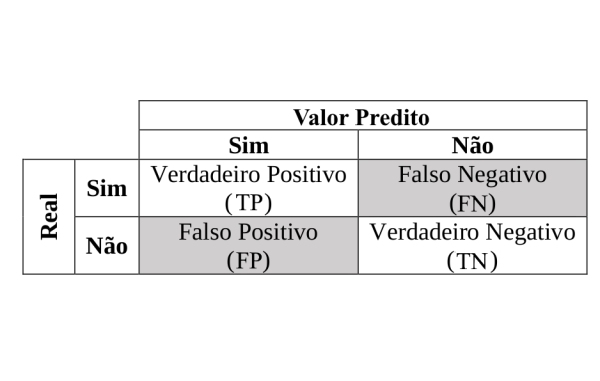

In [31]:
from sklearn.metrics import confusion_matrix

Matriz de confusao para KNN:

In [37]:
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


Matriz de confusao para Naives Bayes:

In [40]:
print(confusion_matrix(y_teste, predito_bnb))

[[1084  485]
 [ 238 1298]]


Matriz de confusao para Arvore de Decisao:

In [45]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 275 1261]]


O algoritmo que classificou a maior parte dos verdadeiros positivos foi o de Arvore de Decisao. Porem, o Naives Bayes classificou melhor os verdadeiros negativos.

Iremos continuar avaliando-os a partir das estatísticas mencionadas no inicio dessa seção.

#7.2 - Acuracia

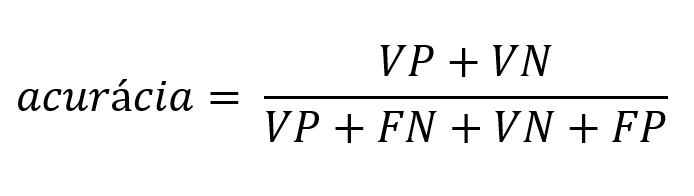

In [48]:
from sklearn.metrics import accuracy_score

Acuracia (%) para KNN:

In [52]:
print(accuracy_score(y_teste, predito_knn)*100)

81.48148148148148


Acuracia (%) para Naives Bayes:

In [53]:
print(accuracy_score(y_teste, predito_bnb)*100)

76.71497584541062


Acuracia (%) para Arvore de Decisao:

In [54]:
print(accuracy_score(y_teste, predito_ArvoreDecisao)*100)

80.8695652173913


Vemos que o algoritmo com maior acuracia, ou seja, que preveu os verdadeiros valores com maior frequencia, foi o KNN. Em seguida, Arvore de Decisao e Naive Bayes

#7.3 - Precisão

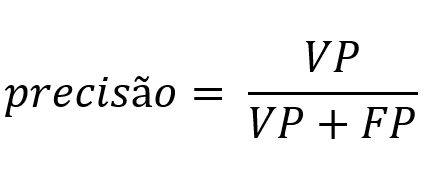

In [57]:
from sklearn.metrics import precision_score

Precisao (%) para KNN:

In [58]:
print(precision_score(y_teste, predito_knn)*100)

79.75232198142415


Precisao (%) para Naives Bayes:

In [59]:
print(precision_score(y_teste, predito_bnb)*100)

72.79865395401009


Precisao (%) para Arvore de Decisao:

In [60]:
print(precision_score(y_teste, predito_ArvoreDecisao)*100)

79.81012658227849


Avaliando o percentual de positivos que foram corretamente previstos, temos que KNN e Arvore de Decisao possuem as performance mais satisfatorias, em torno de 80% em ambos os casos

#7.4 - Sensibilidade (Recall)

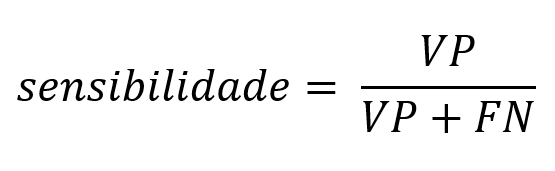

In [61]:
from sklearn.metrics import recall_score

Sensibilidade (%) para KNN:

In [62]:
print(recall_score(y_teste, predito_knn)*100)

83.85416666666666


Sensibilidade (%) para Naives Bayes:

In [63]:
print(recall_score(y_teste, predito_bnb)*100)

84.50520833333334


Sensibilidade (%) para Arvore de Decisao:

In [64]:
print(recall_score(y_teste, predito_ArvoreDecisao)*100)

82.09635416666666


Avaliando o percentual de verdadeiros positivos que foram corretamente previstos, todos algoritmos são bons. entretanto, naive bayes se destaca por 1 ou 2 pontos percentuais a mais que os outros modelos


# 8 - Conclusão

Diante do objetivo de aplicar um modelo de machine learning cujo interesse era classificar o churn de uma cia telefonica, foram executados 3: KNN, Naive Bayes e Decision Tree.

De seu modo, todos se mostraram satisfatorios e como não foi mencionado nenhum contexto adicional, sugiro a utilização da **Arvore de Decisoes** pois ela classificou melhor os verdadeiros positivos, possui maior precisao e suas etapas para chegar na classificação final é mais intuitiva para pessoas leigas, sendo mais facil de explicar a outros colaboradores.